# Chiebuka Onwuzurike MSBA '21

# BA870 – Assignment #4 (June 2021)

 

This is an individual assignment – You must complete this assignment on your own and it must be your own work (not copied from another BA870 student)

 

Due: Submit to Assignments Tab (Assignment #4) by Monday, July 5 at 11:00pm (Boston Time)

# Main Deliverables:

- Complete Steps listed below.
- Attach your Notebook (Use the name "Assignment #4 - YOUR NAME.ipynb" and your CSV file with "assign4.csv") in the Attachments part of this assignment submission.
- Attach a PDF file (Use the name ""Assignment #4 - YOUR NAME.pdf") that include ALL of the text boxes and executed python code output from your Colab notebook in the Attachments part of this assignment submission.

# Goals:

Prepare more data and results for your BA870 Individual Project.
Learn how to download and compute GICS Industry fixed effects.
Merge Compustat data with CRSP data.
Estimate industry fixed effect regressions that attempt to explain long-window stock returns during the year 2020.
Provide a report of your completed assignment and analysis using “Markdown” text boxes in Colab Notebook
Share a Colab Notebook using shareable weblink.
Print a completed and executed Colab Notebook and submit in PDF format.
 




 

# Steps:

### (1) Read the following article MSCI GICS codes:

https://www.msci.com/gics

NOTE:  For the assignment, we will be using the 24 Industry Group GICS (Compustat variable: GGROUP).

### (2) Review the attached Excel file with the exact definitions of the 24 Industry Groups (file name: MSCI_GICS_2018).

### (3) Attached to this assignment is a text file:

"BA870project.txt" contains a the tickers 2,877 U.S. companies that you will analyze for Assignment #4 and for your BA870 Individual Project.

### (4) Use the data and/or code from Assignment #3 to calculate ReturnEarly2020 and ReturnLate2020 for the list of stocks in "BA870project.txt".

Review: For each ticker, calculate the 2 stock return variables based on the data from step (3):

(a) RetEarly2020 = 3-month stock return from January to March 2020

RetEarly2020 = {(1+Ret[Jan 2020])*(1+Ret[Feb 2020])*(1+Ret[Mar 2020])} - 1

(b) RetLate2020 = 9-month stock return from April  to December 2020

RetLate2020 = {(1+Ret[Apr 2020])*(1+Ret[May 2020])*(1+Ret[Jun 2020])*(1+Ret[Jul 2020])*(1+Ret[JAug 2020])*
                          (1+Ret[JSep 2020])*(1+Ret[Oct 2020])*(1+Ret[Nov 2020])*(1+Ret[Dec 2020])} - 1

Save your data in a CSV file called "temp1.csv" with 3 columns:

TICKER, RetEarly2020, RetLate2020

Note: You can calculate the values for RetEarly2020 and RetLate2020 using an Excel formula or you can program it in Python.

### (5) Using the file "BA870project.txt", download the following variables for "Fiscal Year" 2019 from WRDS Compustat:

- GGROUP (GICS Industry Group code)

Save the data (TICKER and GGROUP) in a temporary CSV file "tempGICS.csv"

Hint: You should view a tutorial video titled "Assignment #3 - Tutorial B" to get general instructions on how to download the WRDS Compustt data.

### (6) Create a Colab Notebook that does the following:

(a) Load the data from "temp1.csv" and "tempGICS.csv" into Pandas dataframes. Merge the datasets based on each stock's ticker symbol (TIC). Save the merged datasets in a file called "assign4.csv".

(b) Create Industry Indicator (category) variables for the 24 Industry categories based on GICS GGROUP.

Hints: Use the example Colab Notebook titled "Fixed_Effect_Regression_for_BA870_Lecture_3.ipynb" that is posted on QTools in Lecture #3 folder.

(c) For both ReturnEarly2020 and ReturnLate2020, calculate and estimate the following:

- What are the average stock returns for each industry classification (24 industry groups)?
- Do the highest and lowest return industries make economic sense for early and late 2020? Explain in detail.
- Run fixed effect regressions (using industry fixed effects) to explain both - ReturnEarly2020 and ReturnLate2020:

Hint: You may wish to review the lecture notes from Lecture #3 and use the Colab Notebook: Fixed_Effect_Regression_for_BA870_Lecture_3.ipynb that is posted on QTools in Lecture #3 folder.
- What is the explanatory power of these regressions using different types of industry variables. Is this high or low? Explain.
- Combine the industry fixed effects with other explanatory variables (see Assignment #3 and/or the financial ratios  described in OPTION (3) below).
- Run combined regressions with both industry and other “X” variables.

(d) OPTIONAL: Combine the industry fixed effects with other explanatory variables (see Assignment #3) into a combined multiple regression. Does this help add additional explanatory power? Interpret and explain your results.

Note: Use textboxes in your python Notebook for the explanations.

# Final Submission:
- Go to the Assignments Tab on QuestromTools
- Click on Assignment #4
- Read this document
- Make sure you put your name in a text box (Markdown) at the top of your  - Notebook "Assignment #4 - YOUR NAME.ipynb"
- Attach your Notebook (Use the name "Assignment #4 - YOUR NAME.ipynb" and your - CSV file with "assign4.csv").
- Attach a PDF file (Use the name ""Assignment #4 - YOUR NAME.pdf") that include ALL of the text boxes and executed python code output from your Colab notebook.
- Insert the shared link to your completed Colab Notebook on your Google Drive in the text box below.

In [24]:
import os

# the base Google Drive directory
root_dir = "/content/drive/MyDrive/M/MSBA - 5th Year/BA 870 - Financial and Accounting Analytics"

# choose where you want your project files to be saved
project_folder = "/Assignment 4"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)
  
  !ls

create_and_set_working_directory(project_folder)

 assign4.csv				      temp1.csv
'Assignment #4 - Chiebuka Onwuzurike.ipynb'   temp2.csv
 BA870project.txt			      tempGICS.csv
'MSCI GICS 2018.xlsx'


In [25]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler

In [26]:
# importing data
msci = pd.read_excel('MSCI GICS 2018.xlsx') # 25 GICS codes and Labels
temp1 = pd.read_csv("temp1.csv") # 2711 tickers for Returns of 2020
metrics = pd.read_csv("temp2.csv") # 2841 tickers for Market Metrics
tempGICS = pd.read_csv("tempGICS.csv") # 2839 tickers for GICS codes

# Merging 2020 Return and GIC code
stock = pd.merge(temp1, tempGICS, on="tic", how="inner")

# Saving stock dataframe to "assign4.csv"
stock.to_csv("assign4.csv", header= True)

# Merging stock dataframe with Market Metrics
stock = pd.merge(stock, metrics, on="tic", how="inner")

# Merging stock dataframe with Market Metricss
stock = pd.merge(stock, msci, on="ggroup", how="inner")

In [27]:
# Getting Market Ratios from Market Metrics
stock["mkt_value"] = stock.price * stock.shares
stock["book_price"] = stock.equity / stock.mkt_value 
stock["equity_price"] = stock.net_income / stock.mkt_value 
stock["ebit_price"] = stock.ebit / stock.mkt_value 
stock["sales_price"] = stock.sale / stock.mkt_value 

# Exploratory Data Analysis
Getting info and descriptive statisitcs, and also graphing numerical values

In [29]:
stock.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2674.0,-0.290790,0.312365,-0.908665,-0.440401,-0.312246,-0.170882,7.512067e+00
RetLate2020,2674.0,0.796814,1.070185,-0.858458,0.252222,0.542963,0.984653,1.899385e+01
ggroup,2674.0,3393.552730,1270.228239,1010.000000,2030.000000,3520.000000,4030.000000,6.010000e+03
equity,2673.0,3379.404447,12478.326506,-11577.000000,230.211000,697.480000,2151.487000,2.414090e+05
shares,2672.0,166.600072,472.538558,0.621000,30.476500,57.543500,135.669000,8.836149e+03
ebit,2673.0,756.418446,3087.714981,-8596.000000,19.285000,114.834000,445.200000,6.393000e+04
net_income,2673.0,451.502282,2204.352456,-10137.000000,-7.244000,54.400000,259.175000,5.525600e+04
sale,2673.0,5716.736698,21254.975206,0.000000,268.403000,996.383000,3460.437000,5.214260e+05
price,2670.0,63.828967,145.916396,0.249000,17.185000,35.565000,71.855000,4.250550e+03
mkt_value,2670.0,11627.930835,49155.021315,5.017848,657.588225,2025.844340,6546.704500,1.304756e+06


In [28]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674 entries, 0 to 2673
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tic           2674 non-null   object 
 1   RetEarly2020  2674 non-null   float64
 2   RetLate2020   2674 non-null   float64
 3   ggroup        2674 non-null   int64  
 4   equity        2673 non-null   float64
 5   shares        2672 non-null   float64
 6   ebit          2673 non-null   float64
 7   net_income    2673 non-null   float64
 8   sale          2673 non-null   float64
 9   price         2670 non-null   float64
 10  industry      2674 non-null   object 
 11  mkt_value     2670 non-null   float64
 12  book_price    2670 non-null   float64
 13  equity_price  2670 non-null   float64
 14  ebit_price    2670 non-null   float64
 15  sales_price   2670 non-null   float64
dtypes: float64(13), int64(1), object(2)
memory usage: 355.1+ KB


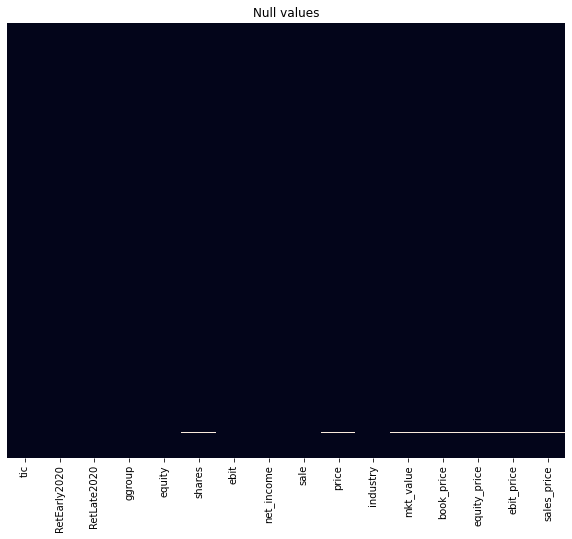

In [30]:
plt.figure(figsize=(10, 8))
plt.title("Null values")
sns.heatmap(stock.isnull(),yticklabels=False,cbar=False)
plt.show()

Null values are due to missing price for 5 values

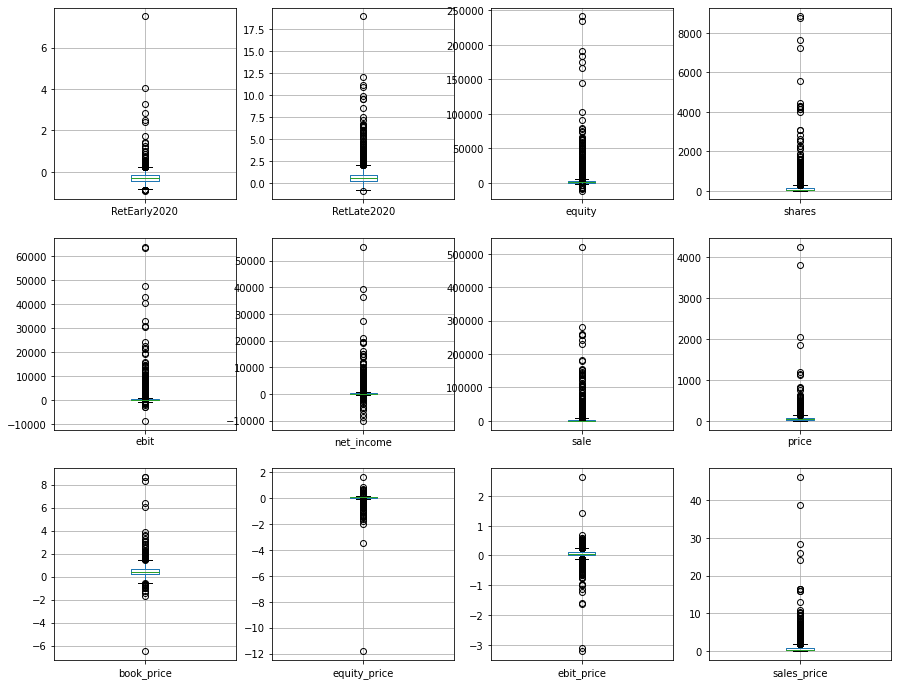

In [31]:
# infinity and nonnumeric values not able to be plotted 
numeric_col = list(stock.drop(["mkt_value","ggroup"], axis= 1).describe(include=[np.number]).columns)  
stock_numeric = stock[numeric_col]
fig, axes = plt.subplots(len(numeric_col)//4,4, figsize=(15, 12))
i = 0
for triaxis in axes:
    for axis in triaxis:
        stock_numeric.boxplot(column = numeric_col[i], ax=axis)
        i = i+1

## Winsorizing Data

In [32]:
def mstats_winsorize(s):

    return mstats.winsorize(s, limits=[0.005, 0.005])

def winsorize(df):

    temp = df.copy()

    return temp.apply(mstats_winsorize, axis=0)

winsor = winsorize(stock)

winsor = winsor[['tic','book_price','equity_price', 'ebit_price', 'sales_price']]

stock_win = stock[['tic', 'RetEarly2020', 'RetLate2020', 'ggroup', 'industry','equity', 'shares', 'ebit',
       'net_income', 'sale', 'price', 'mkt_value']]

stock_win = pd.merge(stock_win, winsor, on="tic", how="inner")

stock_win.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2860.0,-0.294859,0.303871,-0.908665,-0.442014,-0.316601,-0.173739,7.512067e+00
RetLate2020,2860.0,0.788716,1.045018,-0.858458,0.261420,0.540060,0.973000,1.899385e+01
ggroup,2860.0,3304.681818,1269.812997,1010.000000,2020.000000,3510.000000,4020.000000,6.010000e+03
equity,2859.0,3286.202750,11995.259826,-11577.000000,237.872000,703.000000,2137.853000,2.414090e+05
shares,2858.0,159.652370,450.366874,0.621000,30.215250,56.808500,134.454000,8.836149e+03
ebit,2859.0,707.475970,2734.835966,-8596.000000,22.520000,121.753000,438.267500,6.319700e+04
net_income,2859.0,415.588583,1866.214118,-10137.000000,-3.425500,57.700000,254.469000,3.924000e+04
sale,2859.0,5432.749366,19735.490498,0.000000,288.745500,1133.503000,3676.200000,5.214260e+05
price,2856.0,64.644454,142.418807,0.249000,17.507500,36.880000,74.845000,4.250550e+03
mkt_value,2856.0,10837.690819,40928.715872,5.017848,686.828258,2095.768530,6520.892690,1.205301e+06


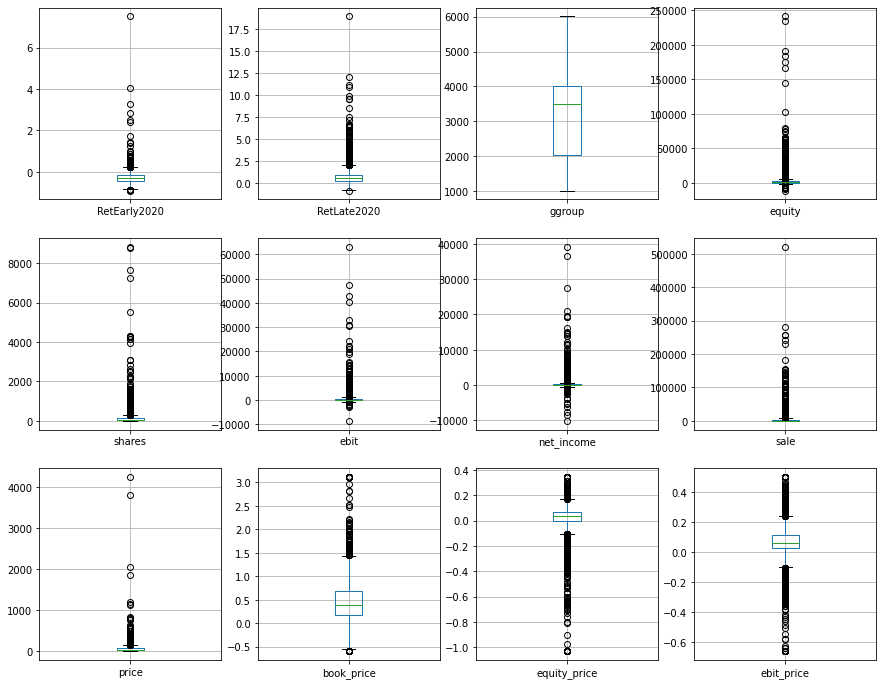

In [33]:
# dropped mkt value to fit price_sale
numeric_col = list(stock_win.drop(["mkt_value"], axis= 1).describe(include=[np.number]).columns)  
numeric = stock_win[numeric_col]

fig, axes = plt.subplots(len(numeric_col)//4, 4, figsize=(15, 12))

i = 0
# print(len(axes))
for triaxis in axes:
    for axis in triaxis:
        numeric.boxplot(column = numeric_col[i], ax=axis)
        i = i+1

In [34]:
stock = stock_win.copy()

# Hot Coding GICS code

In [35]:
# Getting one hot encoded dummy variables for GICS codes
gics_dummies = pd.get_dummies(stock.industry)

# Concatenating stock dataframe with GICS dummy variables
stock = pd.concat([stock,gics_dummies], axis=1) # Chaning 

In [58]:
# stock.sample(5)

# Correlation Matrix between Ratios and Returns

Before running the Fixed Effect Regression I wanted to look at a correlation matrix real quick

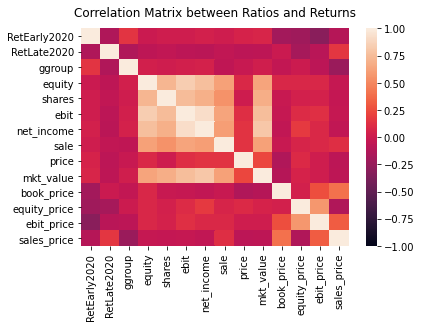

In [37]:
corr_matrix1 = sns.heatmap(stock[['tic', 'RetEarly2020', 'RetLate2020', 'ggroup', 'industry', 'equity',
       'shares', 'ebit', 'net_income', 'sale', 'price', 'mkt_value',
       'book_price', 'equity_price', 'ebit_price', 'sales_price']].corr(), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
corr_matrix1.set_title('Correlation Matrix between Ratios and Returns', fontdict={'fontsize':12}, pad=12);
# plt.figsize=(15, 12)

As dicussion in the last assignment. There is correaltion between the ratios.

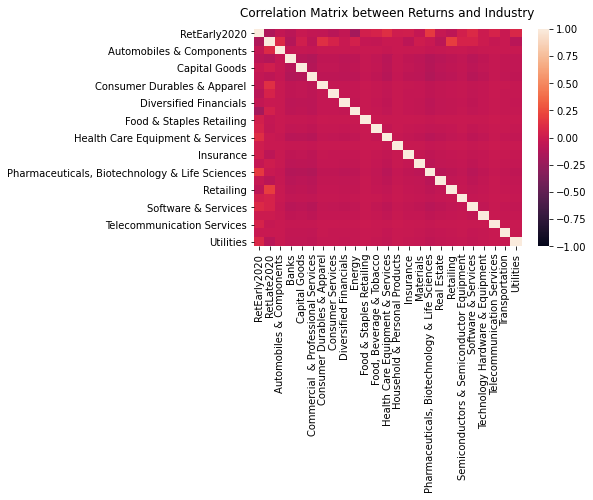

In [38]:
corr_matrix2 = sns.heatmap(stock[['RetEarly2020', 'RetLate2020',
       'Automobiles & Components', 'Banks', 'Capital Goods',
       'Commercial  & Professional Services', 'Consumer Durables & Apparel',
       'Consumer Services', 'Diversified Financials', 'Energy',
       'Food & Staples Retailing', 'Food, Beverage & Tobacco',
       'Health Care Equipment & Services', 'Household & Personal Products',
       'Insurance', 'Materials',
       'Pharmaceuticals, Biotechnology & Life Sciences', 'Real Estate',
       'Retailing', 'Semiconductors & Semiconductor Equipment',
       'Software & Services', 'Technology Hardware & Equipment',
       'Telecommunication Services', 'Transportation', 'Utilities']].corr(), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
corr_matrix2.set_title('Correlation Matrix between Returns and Industry', fontdict={'fontsize':12}, pad=12);
# plt.figsize=(15, 12)

There isn't much correlation between thhe Returns of 2020 and the industry. Additionally obviously the industries aren't correlated with each other because they are one hot encoded.

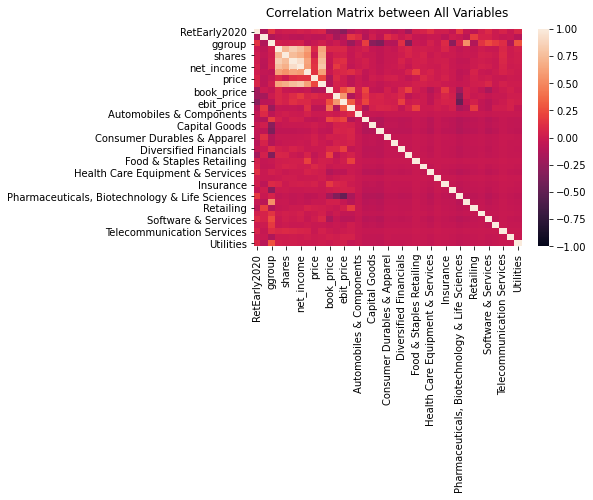

In [39]:
corr_matrix3 = sns.heatmap(stock[['tic', 'RetEarly2020', 'RetLate2020', 'ggroup', 'industry', 'equity',
       'shares', 'ebit', 'net_income', 'sale', 'price', 'mkt_value',
       'book_price', 'equity_price', 'ebit_price', 'sales_price',
       'Automobiles & Components', 'Banks', 'Capital Goods',
       'Commercial  & Professional Services', 'Consumer Durables & Apparel',
       'Consumer Services', 'Diversified Financials', 'Energy',
       'Food & Staples Retailing', 'Food, Beverage & Tobacco',
       'Health Care Equipment & Services', 'Household & Personal Products',
       'Insurance', 'Materials',
       'Pharmaceuticals, Biotechnology & Life Sciences', 'Real Estate',
       'Retailing', 'Semiconductors & Semiconductor Equipment',
       'Software & Services', 'Technology Hardware & Equipment',
       'Telecommunication Services', 'Transportation', 'Utilities']].corr(), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
corr_matrix3.set_title('Correlation Matrix between All Variables', fontdict={'fontsize':12}, pad=12);
# plt.figsize=(15, 12)

There is soome positve and negative correlation with the one hot encoded industties and the other variables and metrics.

# Average Returns for Early and Late 2020

In [40]:
avg_returns = stock.groupby(['ggroup','industry']).agg({'RetEarly2020': np.mean,'RetLate2020': np.mean}).reset_index()
avg_returns

,ggroup,industry,RetEarly2020,RetLate2020
0,1010,Energy,-0.580745,1.017517
1,1510,Materials,-0.345669,0.854943
2,2010,Capital Goods,-0.316507,0.895985
3,2020,Commercial & Professional Services,-0.332514,0.605461
4,2030,Transportation,-0.326785,0.709768
5,2510,Automobiles & Components,-0.429483,1.811358
6,2520,Consumer Durables & Apparel,-0.390116,1.581974
7,2530,Consumer Services,-0.449971,1.129696
8,2550,Retailing,-0.398062,1.776409
9,3010,Food & Staples Retailing,-0.175851,0.404087


In [41]:
print(f'Early 2020 Avg Returns Industry Max: \t{avg_returns.industry[avg_returns.RetEarly2020.idxmax()]}')
print(f'Early 2020 Avg Returns Industry Min: \t{avg_returns.industry[avg_returns.RetEarly2020.idxmin()]}')
print(f'Late  2020 Avg Returns Industry Max: \t{avg_returns.industry[avg_returns.RetLate2020.idxmax()]}')
print(f'Late  2020 Avg Returns Industry Min: \t{avg_returns.industry[avg_returns.RetLate2020.idxmin()]}')

Early 2020 Avg Returns Industry Max: 	Telecommunication Services
Early 2020 Avg Returns Industry Min: 	Energy
Late  2020 Avg Returns Industry Max: 	Automobiles & Components
Late  2020 Avg Returns Industry Min: 	Utilities


### Early 2020 Max Results:

Telecommunication Services 
- This makes sense given the of telecommunication such as Zoom, Skype, Cisco, etc. allowing for work/school from home
- Addtional Wifi and things to stay connected become even more of a necessity than they already were

### Early 2020 Min Results:

Energy
- People in their homes started to use more resources. 

### Late 2020 Max Results:

Automobiles & Components
- This might make snese. I know used cars had a boom due to under supply of new cars due to pandemic shut downs.
- Addition stimulus packages also known as "a stimmy" on the streets gave people extra income to buy large purchase such as cars 
- Low interest rates helped as well 


I only know about the used cars increase thank to a podcast by NPR called the Indicator that I listened to awhile back:

https://www.npr.org/2020/11/10/933497794/the-case-of-the-soaring-car-prices

### Late 2020 Min Results:

Utilities
- Kind of makes sense. I thought the utlites would be higher becasue everyone is staying at home. However if governments are allowing renters not to pay landlord without evictions, maybe they are also allowing utilites to be forgiven because they are essential to life at home.
- Also I believe the commericial sector would pay more for utliites than the residential secotor. Thus with all the shutdowns of businesses, revenues would decline.


# Fixed effect regressions 

I will be evaluaiting the 24 industries using a Fixed effect Regression. The output variable will be both early and late 2020 Returns. The input variables are one hot encoded industry classifications.

The value of the coeficient  when an insutry variable is off and all other are on is the average Returns in 2020 during that period.

# ReturnEarly2020


## ReturnEarly2020 by Industry Classification

In [42]:
# Dependent Variables
X = stock[['Automobiles & Components', 'Banks', 'Capital Goods',
       'Commercial  & Professional Services', 'Consumer Durables & Apparel',
       'Consumer Services', 'Diversified Financials', 'Energy',
       'Food & Staples Retailing', 'Food, Beverage & Tobacco',
       'Health Care Equipment & Services', 'Household & Personal Products',
       'Insurance', 'Materials',
       'Pharmaceuticals, Biotechnology & Life Sciences', 'Real Estate',
       'Retailing', 'Semiconductors & Semiconductor Equipment',
       'Software & Services', 'Technology Hardware & Equipment',
       'Telecommunication Services', 'Transportation', 'Utilities']]

# Independent Variables
Y = stock[['RetEarly2020']]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetEarly2020 v Industries"))
results1 = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

                          RetEarly2020 v Industries                           
Dep. Variable:           RetEarly2020   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     19.00
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           2.59e-69
Time:                        23:52:18   Log-Likelihood:                -454.43
No. Observations:                2860   AIC:                             954.9
Df Residuals:                    2837   BIC:                             1092.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### Explaination of RetrunEarly2020 v. 24 Industry Variables

- All the coefficient were negative which makes sense because every industry was hit hard.
- Except for Telecommunication Services all the other variable we are 95% confident
- Which is interesting because Telecommunication Services also has the lowest negative coefficient 
- The R^2 is 0.128 and the Adjusted R^2 is 0.122 so there isn't much exaplained variance 



In [57]:
results1.sort_values(by="coef")

,coef,std err,t,P>|t|,[0.025,0.975]
Energy,-0.5807,0.028,-20.796,0.000,-0.636,-0.526
Consumer Services,-0.4500,0.030,-15.072,0.000,-0.509,-0.391
Automobiles & Components,-0.4295,0.053,-8.121,0.000,-0.533,-0.326
Retailing,-0.3981,0.027,-14.989,0.000,-0.450,-0.346
Consumer Durables & Apparel,-0.3901,0.031,-12.555,0.000,-0.451,-0.329
Banks,-0.3679,0.017,-22.148,0.000,-0.400,-0.335
Diversified Financials,-0.3596,0.026,-14.059,0.000,-0.410,-0.309
Materials,-0.3457,0.026,-13.352,0.000,-0.396,-0.295
Commercial & Professional Services,-0.3325,0.016,-21.274,0.000,-0.363,-0.302
Real Estate,-0.3274,0.022,-15.210,0.000,-0.370,-0.285


## ReturnEarly2020 by Industry Classification with Metrics

In [56]:
# Dependent Variables
X = stock[['book_price', 'equity_price', 'ebit_price', 'sales_price','Automobiles & Components', 'Banks', 'Capital Goods',
       'Commercial  & Professional Services', 'Consumer Durables & Apparel',
       'Consumer Services', 'Diversified Financials', 'Energy',
       'Food & Staples Retailing', 'Food, Beverage & Tobacco',
       'Health Care Equipment & Services', 'Household & Personal Products',
       'Insurance', 'Materials',
       'Pharmaceuticals, Biotechnology & Life Sciences', 'Real Estate',
       'Retailing', 'Semiconductors & Semiconductor Equipment',
       'Software & Services', 'Technology Hardware & Equipment',
       'Telecommunication Services', 'Transportation', 'Utilities']]

# Independent Variables
Y = stock[['RetEarly2020']]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetEarly2020 v Industries"))
results2 = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

                          RetEarly2020 v Industries                           
Dep. Variable:           RetEarly2020   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     24.38
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.21e-104
Time:                        00:29:15   Log-Likelihood:                -362.17
No. Observations:                2860   AIC:                             778.3
Df Residuals:                    2833   BIC:                             939.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### Explaination of RetrunEarly2020 v. 24 Industry Variables with Metrics

- Again all the coefficient were negative which makes sense because every industry was hit hard.
- sales_price was the highest coefficient instead of Telecommunication, and it also was the only variable that was positive.
- Except for Telecommunication Services all the other variable we are 95% confident
- sales_price, equity_price, and Food & Staple Retailing all had confidence intervals that didn't contain 0 before were close.
- The R^2 and Adj R^2 improves from 0.128 and 0.122 respectively to 0.183 and 0.175 which means there is more than just industry that affects 


In [54]:
results2.sort_values(by="coef", ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
sales_price,0.0089,0.004,2.016,0.044,0.000,0.017
Telecommunication Services,-0.0375,0.062,-0.605,0.545,-0.159,0.084
book_price,-0.0656,0.015,-4.369,0.000,-0.095,-0.036
Utilities,-0.0707,0.034,-2.106,0.035,-0.137,-0.005
equity_price,-0.0991,0.050,-1.976,0.048,-0.197,-0.001
Food & Staples Retailing,-0.1198,0.061,-1.959,0.050,-0.240,0.000
"Food, Beverage & Tobacco",-0.1283,0.035,-3.717,0.000,-0.196,-0.061
Health Care Equipment & Services,-0.1313,0.021,-6.329,0.000,-0.172,-0.091
Insurance,-0.1351,0.033,-4.122,0.000,-0.199,-0.071
Household & Personal Products,-0.1667,0.057,-2.940,0.003,-0.278,-0.056


# ReturnLate2020 by Industry Classification

## ReturnLate2020 by Industry Classification

In [44]:
# Dependent Variables
X = stock[['Automobiles & Components', 'Banks', 'Capital Goods',
       'Commercial  & Professional Services', 'Consumer Durables & Apparel',
       'Consumer Services', 'Diversified Financials', 'Energy',
       'Food & Staples Retailing', 'Food, Beverage & Tobacco',
       'Health Care Equipment & Services', 'Household & Personal Products',
       'Insurance', 'Materials',
       'Pharmaceuticals, Biotechnology & Life Sciences', 'Real Estate',
       'Retailing', 'Semiconductors & Semiconductor Equipment',
       'Software & Services', 'Technology Hardware & Equipment',
       'Telecommunication Services', 'Transportation', 'Utilities']]

# Independent Variables
Y = stock[['RetLate2020']]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetLate2020 v Industries"))
results3 = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

                           RetLate2020 v Industries                           
Dep. Variable:            RetLate2020   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     16.59
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.02e-59
Time:                        23:52:18   Log-Likelihood:                -4010.5
No. Observations:                2860   AIC:                             8067.
Df Residuals:                    2837   BIC:                             8204.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### Explaination of RetrunLate2020 v. 24 Industry Variables

- All the coefficient were positive which makes sense because many industries did bounce back from the first hit of the corona virus. Returns didn't get to pre pandemic level but things did start to turn around
- Except for Food & Staples Retailing and Utilities all the other variable we are 95% confident
- 7 industries had coefficients greater than 1.0 (Automobiles & Components, Retailing, Consumer Durables, Semiconductors, Consumer Services, Software, and Energy
- The R^2 is 0.114 and the Adjusted R^2 is 0.107 so there isn't much exaplained variance but compared to the R^2 and Adj R of 0.128 and 0.122 of ReturnEarly2020 Fixed Regression.



In [45]:
results3.sort_values(by="coef", ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
Automobiles & Components,1.8114,0.183,9.878,0.000,1.452,2.171
Retailing,1.7764,0.092,19.292,0.000,1.596,1.957
Consumer Durables & Apparel,1.5820,0.108,14.683,0.000,1.371,1.793
Semiconductors & Semiconductor Equipment,1.2186,0.125,9.717,0.000,0.973,1.464
Consumer Services,1.1297,0.104,10.913,0.000,0.927,1.333
Software & Services,1.0192,0.073,13.924,0.000,0.876,1.163
Energy,1.0175,0.097,10.508,0.000,0.828,1.207
Capital Goods,0.8960,0.064,13.910,0.000,0.770,1.022
Materials,0.8549,0.090,9.524,0.000,0.679,1.031
Technology Hardware & Equipment,0.8186,0.104,7.865,0.000,0.615,1.023


## ReturnLate2020 by Industry Classification with Metrics

In [51]:
# Dependent Variables
X = stock[['book_price', 'equity_price', 'ebit_price', 'sales_price','Automobiles & Components', 'Banks', 'Capital Goods',
       'Commercial  & Professional Services', 'Consumer Durables & Apparel',
       'Consumer Services', 'Diversified Financials', 'Energy',
       'Food & Staples Retailing', 'Food, Beverage & Tobacco',
       'Health Care Equipment & Services', 'Household & Personal Products',
       'Insurance', 'Materials',
       'Pharmaceuticals, Biotechnology & Life Sciences', 'Real Estate',
       'Retailing', 'Semiconductors & Semiconductor Equipment',
       'Software & Services', 'Technology Hardware & Equipment',
       'Telecommunication Services', 'Transportation', 'Utilities']]

# Independent Variables
Y = stock[['RetLate2020']]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="RetLate2020 v Industries"))
results4 = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

                           RetLate2020 v Industries                           
Dep. Variable:            RetLate2020   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     19.06
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.26e-80
Time:                        00:20:28   Log-Likelihood:                -3953.1
No. Observations:                2860   AIC:                             7960.
Df Residuals:                    2833   BIC:                             8121.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### Explaination of RetrunLate2020 v. 24 Industry Variables with Metric

- All the coefficient were positive except for book_price, equity_price, and ebit_price. Which I don't really have a great explaination for that
- Except for Food & Staples Retailing and book_price all the other variable we are 95% confident
- However Utilities and Telecommunication had 95% confidence intervals that didn't contain 0 but were close.
- Now only 5 industries had coefficients greater than 1.0 (Automobiles & Components, Retailing, Consumer Durables, Semiconductors, and Consumer Services)
- The R^2 and Adj R^2 improves from 0.114 and 0.107 respectively to 0.149 and 0.141 which means there is more than just industry that affects.
- However the R^2 and Adj R^2 were higher for the ReturnEarly2020 in comparison to RetrunLate2020

In [ ]:
results4.sort_values(by="coef", ascending=False)

,coef,std err,t,P>|t|,[0.025,0.975]
Automobiles & Components,1.8114,0.183,9.878,0.000,1.452,2.171
Retailing,1.7764,0.092,19.292,0.000,1.596,1.957
Consumer Durables & Apparel,1.5820,0.108,14.683,0.000,1.371,1.793
Semiconductors & Semiconductor Equipment,1.2186,0.125,9.717,0.000,0.973,1.464
Consumer Services,1.1297,0.104,10.913,0.000,0.927,1.333
Software & Services,1.0192,0.073,13.924,0.000,0.876,1.163
Energy,1.0175,0.097,10.508,0.000,0.828,1.207
Capital Goods,0.8960,0.064,13.910,0.000,0.770,1.022
Materials,0.8549,0.090,9.524,0.000,0.679,1.031
Technology Hardware & Equipment,0.8186,0.104,7.865,0.000,0.615,1.023
